# Processamento dos dados de Ilha Rasa - Sensor GX3
- Henrique P P Pereira
- Hanna Luizete
- Carlos E Parente

In [10]:
import os
import pandas as pd
import scipy.io
import matplotlib
import matplotlib.pylab as pl
from datetime import datetime
import waveproc
%matplotlib inline

In [4]:
pathname = os.environ['HOME'] + '/Dropbox/database/historical/buoys/lts/ilharasa_hanna/'

aew = pd.read_csv(pathname + 'TOA5_61689.microstrain_stbaclEW.dat', 
    skiprows=4, header=None, index_col=0, parse_dates=True)

ans = pd.read_csv(pathname + 'TOA5_61689.microstrain_stbaclNS.dat', 
    skiprows=4, header=None, index_col=0, parse_dates=True)

av = pd.read_csv(pathname + 'TOA5_61689.microstrain_stbaclV.dat', 
    skiprows=4, header=None, index_col=0, parse_dates=True)

#remove uma coluna que nao faz parte da serie temporal
aew = aew.drop(aew.columns[0], axis=1)
ans = ans.drop(ans.columns[0], axis=1)
av = av.drop(av.columns[0], axis=1)

In [6]:
#processamento

w = waveproc.WaveProc(pathname)

w.h = 60
w.fs = 1.0
w.dt = 1 / w.fs
w.nfft = 128

dd = []
for i in range(len(av)):
    
#     print (av.index[i])
    
    w.date = av.index[i]
    w.n1 = av.ix[i]
    w.n2 = ans.ix[i]
    w.n3 = aew.ix[i]
    
#     w.timedomain()
    w.freqdomain()
    
    dd.append({'date'   : w.date,
#                'hs'     : w.hs,
#                'h10'    : w.h10,
#                'hmax'   : w.hmax,
#                'tmed'   : w.tmed,
#                'thmax'  : w.thmax,
               'hm0'    : w.hm0,
               'tp'     : w.tp,
               'dp'     : w.dp,
#                'tzamax' : w.tzamax
              })
    
dd = pd.DataFrame(dd)
dd = dd.set_index('date')

In [7]:
dd

,dp,hm0,tp
date,,,
2014-10-03 15:00:00,108.814932,1.021575,8.533333
2014-10-03 16:00:00,81.229100,0.966649,9.142857
2014-10-03 17:00:00,125.058334,0.981503,7.529412
2014-10-03 18:00:00,94.725973,0.991533,9.142857
2014-10-03 19:00:00,100.184412,1.001418,9.142857
2014-10-03 20:00:00,131.234911,1.029645,9.142857
2014-10-03 21:00:00,92.851998,0.957420,8.000000
2014-10-03 22:00:00,102.318951,0.947804,9.846154
2014-10-03 23:00:00,92.883185,1.009432,9.142857


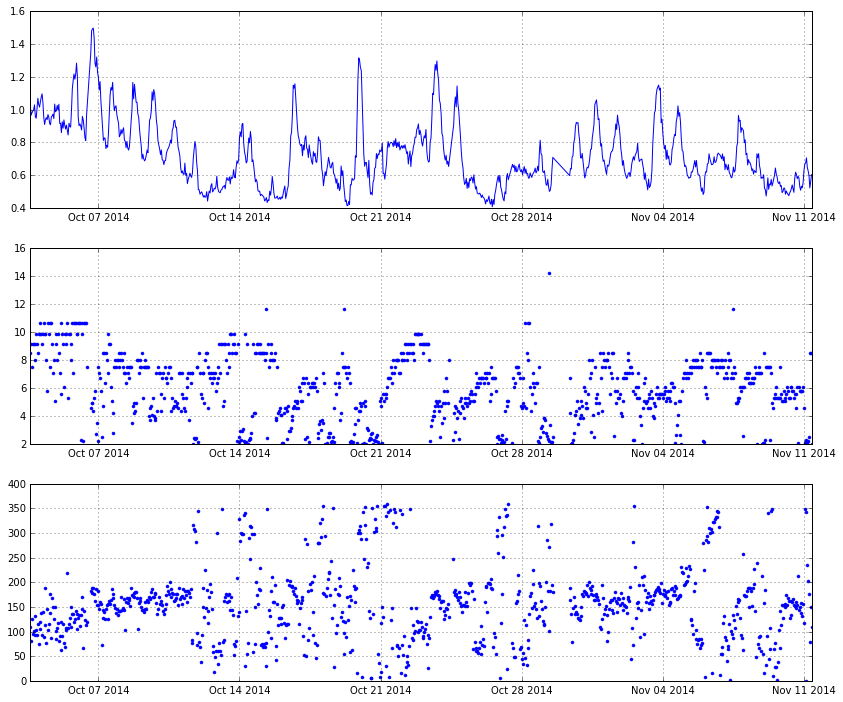

In [8]:
pl.figure(figsize=(14,12))
pl.subplot(311)
pl.plot(dd.index, dd.hm0)
pl.grid()
pl.subplot(312)
pl.plot(dd.index, dd.tp,'.')
pl.grid()
pl.subplot(313)
pl.plot(dd.index, dd.dp,'.')
pl.grid()

pl.show()

In [35]:
#interpola os dados
# av = av.resample('H').asfreq()
# aew = aew.resample('H').asfreq()
# ans = ans.resample('H').asfreq()

ix = pd.DatetimeIndex(start=datetime(2014, 10, 1, 0), end=datetime(2014, 10, 30, 23), freq='H')

av = av.reindex(ix)
aew = aew.reindex(ix)
ans = ans.reindex(ix)

dados = {'av': av.values,
         'aew': aew.values,
         'ans': ans.values}

In [37]:
scipy.io.savemat('dadosgx3.mat', mdict ={'gx3': dados})